In [164]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from collections import Counter
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

In [97]:
data1=pd.read_csv('boxes.csv')
data2=pd.read_csv('boxes2.csv')
data3=pd.read_csv('chrome.csv')
data4=pd.read_csv('dart.csv')
data5=pd.read_csv('dart2.csv')
data6=pd.read_csv('face.csv')
data7=pd.read_csv('isolation.csv')
data8=pd.read_csv('lines.csv')
data8=pd.read_csv('spiral2.csv')
data9=pd.read_csv('hyperplane.csv')
data10=pd.read_csv('Online_Retail.csv',encoding="unicode_escape")

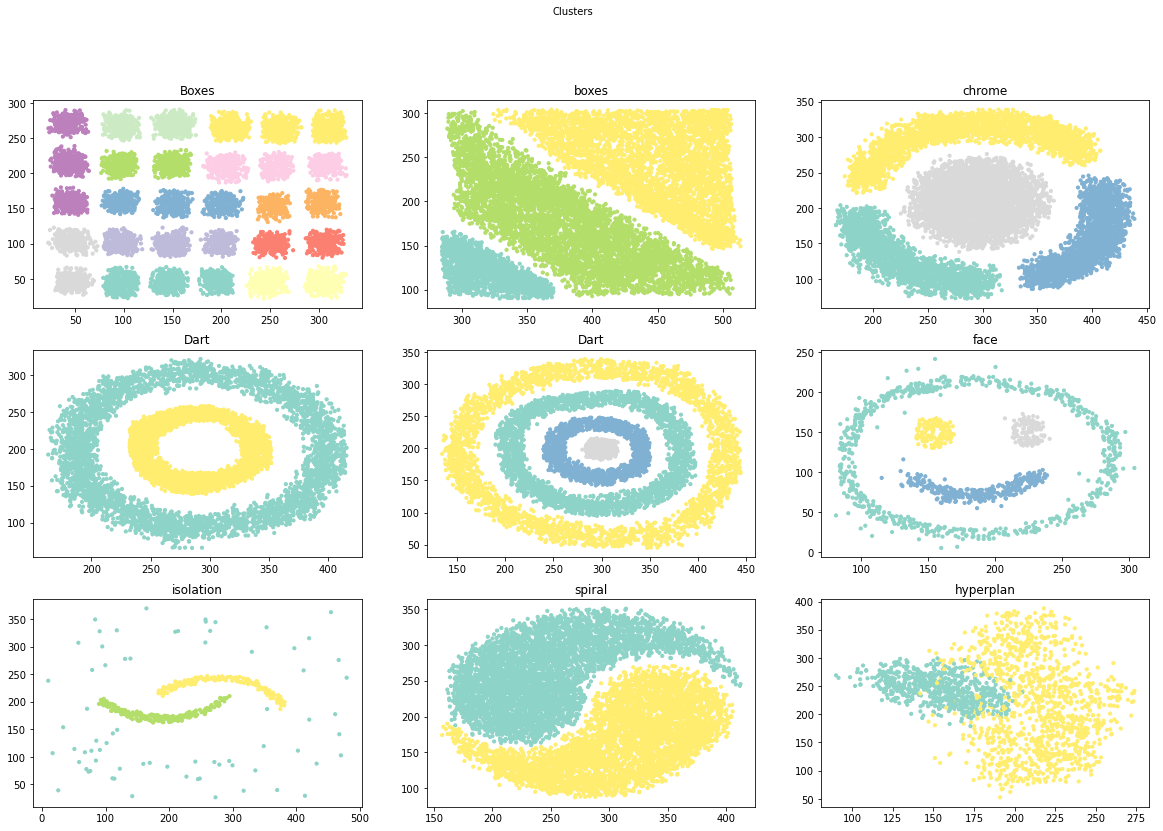

In [80]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(20,13))
fig.suptitle('Clusters',size=10)

axes[0,0].scatter(data1['x'],data1['y'], c=data1['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Boxes")

axes[0,1].scatter(data2['x'], data2['y'], c=data2['color'], s=10, cmap = "Set3")
axes[0,1].set_title("boxes")

axes[0,2].scatter(data3['x'], data3['y'], c=data3['color'], s=10, cmap = "Set3")
axes[0,2].set_title("chrome")

axes[1,0].scatter(data4['x'], data4['y'], c=data4['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Dart")

axes[1,1].scatter(data5['x'], data5['y'], c=data5['color'], s=10, cmap = "Set3")
axes[1,1].set_title("Dart")

axes[1,2].scatter(data6['x'], data6['y'], c=data6['color'], s=10, cmap = "Set3")
axes[1,2].set_title("face")


axes[2,0].scatter(data7['x'], data7['y'], c=data7['color'], s=10, cmap = "Set3")
axes[2,0].set_title("isolation")

axes[2,1].scatter(data8['x'], data8['y'], c=data8['color'], s=10, cmap = "Set3")
axes[2,1].set_title("spiral")

axes[2,2].scatter(data9['x'], data9['y'], c=data9['color'], s=10, cmap = "Set3")
axes[2,2].set_title("hyperplan");

In [98]:
data10.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,31-10-2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [99]:
data10.drop(["Country","Description","StockCode","InvoiceNo"],axis=1,inplace=True)

In [100]:
data10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Quantity     541909 non-null  int64  
 1   InvoiceDate  541909 non-null  object 
 2   UnitPrice    541909 non-null  float64
 3   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 16.5+ MB


In [129]:
data10.isnull().sum()

Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [102]:
data10[data10['Quantity']<0].sum()

Quantity                                                 -484531
InvoiceDate    1/12/2010 9:411/12/2010 9:491/12/2010 10:241/1...
UnitPrice                                              449480.32
CustomerID                                           133500797.0
dtype: object

In [103]:
data=data10.loc[data10["Quantity"]>0]
data[data['UnitPrice']<0].sum()

Quantity                                    2
InvoiceDate    12/8/2011 14:5112/8/2011 14:52
UnitPrice                           -22124.12
CustomerID                                0.0
dtype: object

In [104]:
data=data.loc[data['UnitPrice']>0]
data.sample(5)

,Quantity,InvoiceDate,UnitPrice,CustomerID
497257,4,24-11-2011 10:12,4.95,17139.0
304471,1,17-08-2011 15:53,5.95,16706.0
305296,40,18-08-2011 11:59,0.42,14132.0
407631,12,19-10-2011 14:40,2.10,15754.0
336112,12,12/9/2011 9:03,1.65,18158.0


In [105]:
data["Total"]=data["Quantity"]*data["UnitPrice"]
data.sample(5)

,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
105694,12,1/3/2011 10:26,0.85,18075.0,10.20
283634,6,29-07-2011 13:28,1.95,12716.0,11.70
484802,3,20-11-2011 14:33,2.08,13565.0,6.24
245839,1,30-06-2011 19:52,7.95,16498.0,7.95
315667,5,28-08-2011 13:18,1.65,17841.0,8.25


In [112]:
data.isnull().sum()

InvoiceDate         0
CustomerID     132220
Total               0
dtype: int64

In [113]:
data.dropna(axis=0,inplace=True)

In [117]:
#Amount
Amount = data.groupby('CustomerID')['Total'].sum()
Amount = Amount.reset_index()
Amount.columns=['CustomerID','Amount']

#frequency
Frequency=data.groupby('CustomerID')['InvoiceDate'].count()
Frequency=Frequency.reset_index()
Frequency.columns=['CustomerID','Frequency']

# merge both df
df = pd.merge(Amount, Frequency, on='CustomerID', how='inner')
df.sample(5)

,CustomerID,Amount,Frequency
565,13092.0,477.83,25
68,12430.0,256.40,11
3955,17757.0,5605.29,741
2536,15797.0,2207.40,8
203,12598.0,3023.08,132


In [120]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,4338.0,2054.266460,8989.230441,3.75,307.415,674.485,1661.74,280206.02
Frequency,4338.0,91.720609,228.785094,1.00,17.000,41.000,100.00,7847.00


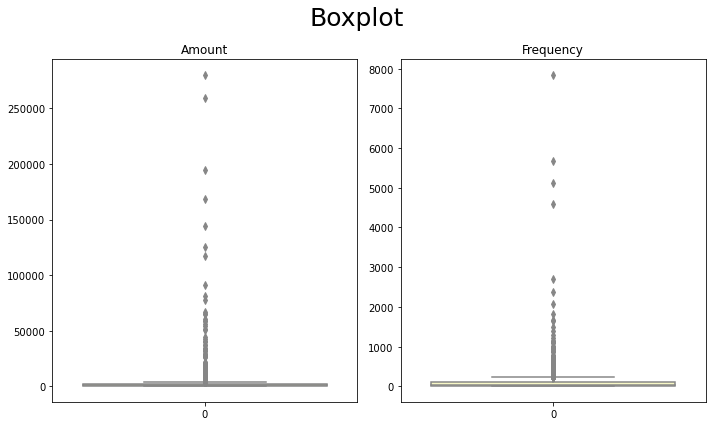

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,6))
fig.suptitle('Boxplot', size = 25)

sns.boxplot(ax=axes[0], data=df1['Amount'], palette='Spectral').set_title("Amount")
sns.boxplot(ax=axes[1], data=df1['Frequency'], palette='Spectral').set_title("Frequency")

plt.tight_layout()

In [136]:
df1=df.copy()
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(df1)

IsolationForest(contamination=0.1, n_estimators=150)

In [137]:
scores=model.decision_function(df1)
anomaly=model.predict(df1)

df1['scores']=scores
df1['anomaly']=anomaly

anomaly = df1.loc[df1['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 434


In [141]:
df1.sample(5)

,Amount,Frequency,scores,anomaly
60,803.56,39,0.144063,1
549,344.00,2,0.111429,1
1979,1489.50,25,0.091387,1
2979,163.07,62,0.106389,1
1734,1126.37,28,0.113787,1


In [ ]:
df1 = df1.drop(anomaly_index, axis = 0).reset_index(drop=True)

In [147]:
df

,Amount,Frequency
0,77183.60,1
1,4310.00,182
2,1797.24,31
3,1757.55,73
4,334.40,17
...,...,...
4333,180.60,10
4334,80.82,7
4335,178.05,12
4336,2094.88,756


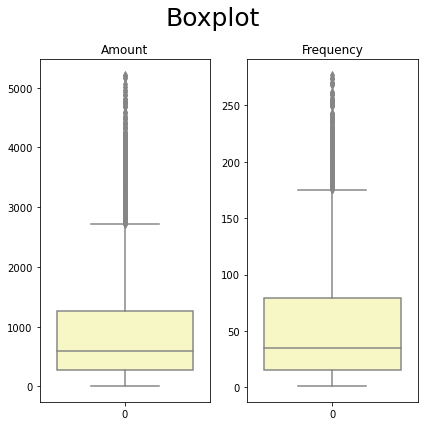

In [148]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Boxplot', size = 25)

sns.boxplot(ax=axes[0], data=df1['Amount'], palette='Spectral').set_title("Amount")
sns.boxplot(ax=axes[1], data=df1['Frequency'], palette='Spectral').set_title("Frequency")

plt.tight_layout()

In [ ]:
df1.drop(['scores', 'anomaly'], axis = 1, inplace =True)


In [154]:
df1.sample(5)

,Amount,Frequency
3777,911.15,213
1602,77.40,3
2546,1863.47,111
307,545.48,24
1160,1266.23,74


In [156]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2=scaler.fit_transform(df1)

In [157]:
df2

array([[ 3.57609679,  2.29036814],
       [ 0.91675953, -0.44938641],
       [ 0.87475429,  0.31266452],
       ...,
       [-0.8997847 , -0.88484409],
       [-0.79688296, -0.79412374],
       [ 0.95913519,  0.25823231]])

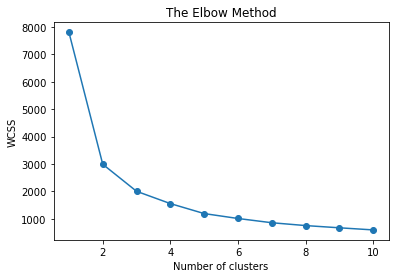

In [162]:
#elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

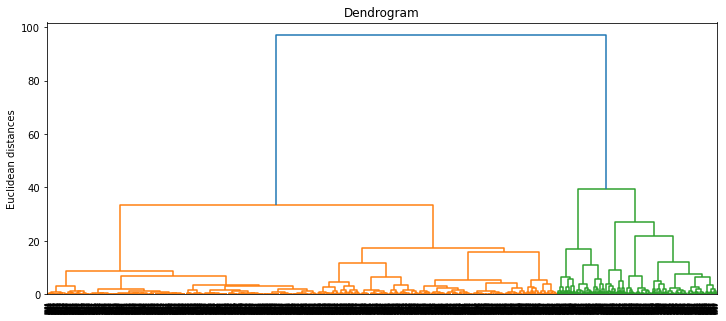

In [166]:
plt.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(df2, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [172]:
#kmeans model
df_kmeans = df2.copy()
data1_kmeans = data1.copy()
data2_kmeans = data2.copy()
data3_kmeans = data3.copy()
data4_kmeans = data4.copy()
data5_kmeans = data5.copy()
data6_kmeans = data6.copy()
data7_kmeans = data7.copy()
data8_kmeans = data8.copy()
data9_kmeans = data9.copy()

In [173]:
data1_kmeans.drop(['color'], axis = 1, inplace =True)
data2_kmeans.drop(['color'], axis = 1, inplace =True)
data3_kmeans.drop(['color'], axis = 1, inplace =True)
data4_kmeans.drop(['color'], axis = 1, inplace =True)
data5_kmeans.drop(['color'], axis = 1, inplace =True)
data6_kmeans.drop(['color'], axis = 1, inplace =True)
data7_kmeans.drop(['color'], axis = 1, inplace =True)
data8_kmeans.drop(['color'], axis = 1, inplace =True)
data9_kmeans.drop(['color'], axis = 1, inplace =True)

In [192]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_kmeans)

kmeans_data1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_data2 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_data3 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans_data4 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_data5 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_data6 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_data7 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_data8 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_data9 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
                      

In [193]:
y_kmeans_data1 = kmeans_data1.fit_predict(data1_kmeans)
y_kmeans_data2 = kmeans_data2.fit_predict(data2_kmeans)
y_kmeans_data3 = kmeans_data3.fit_predict(data3_kmeans)
y_kmeans_data4 = kmeans_data4.fit_predict(data4_kmeans)
y_kmeans_data5 = kmeans_data5.fit_predict(data5_kmeans)
y_kmeans_data6 = kmeans_data6.fit_predict(data6_kmeans)
y_kmeans_data7 = kmeans_data7.fit_predict(data7_kmeans)
y_kmeans_data8 = kmeans_data8.fit_predict(data8_kmeans)
y_kmeans_data9 = kmeans_data9.fit_predict(data9_kmeans)

In [194]:
# Creating 'Cluster'
data1_kmeans['Cluster'] = y_kmeans_data1
data2_kmeans['Cluster'] = y_kmeans_data2
data3_kmeans['Cluster'] = y_kmeans_data3
data4_kmeans['Cluster'] = y_kmeans_data4
data5_kmeans['Cluster'] = y_kmeans_data5
data6_kmeans['Cluster'] = y_kmeans_data6
data7_kmeans['Cluster'] = y_kmeans_data7
data8_kmeans['Cluster'] = y_kmeans_data8
data9_kmeans['Cluster'] = y_kmeans_data9

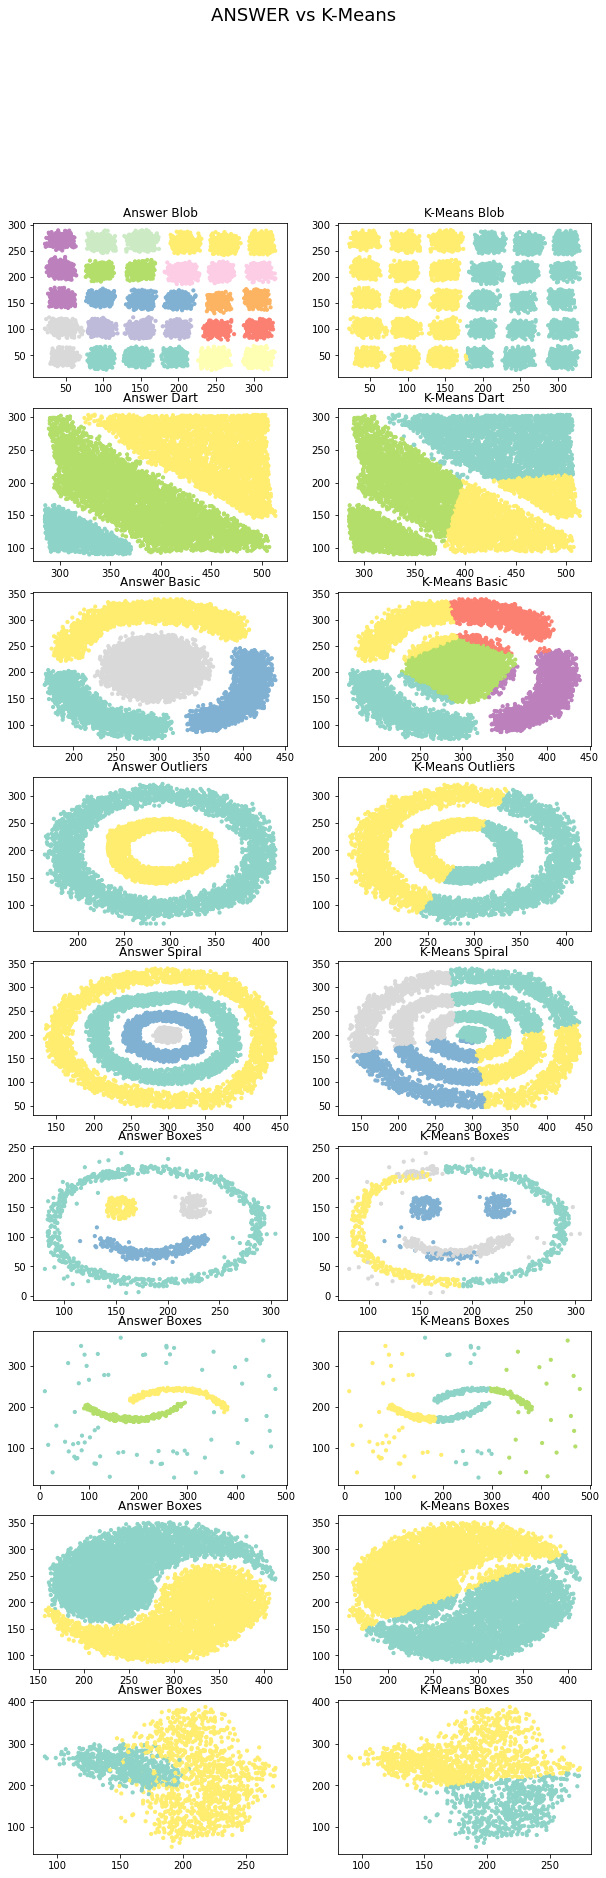

<Figure size 432x288 with 0 Axes>

In [202]:
fig, axes = plt.subplots(nrows=9, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs K-Means\n', size = 18)

axes[0,0].scatter(data1['x'], data1['y'], c=data1['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Blob");
axes[0,1].scatter(data1_kmeans['x'], data1_kmeans['y'], c=data1_kmeans['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("K-Means Blob");

axes[1,0].scatter(data2['x'], data2['y'], c=data2['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer Dart");
axes[1,1].scatter(data2_kmeans['x'], data2_kmeans['y'], c=data2_kmeans['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("K-Means Dart");

axes[2,0].scatter(data3['x'], data3['y'], c=data3['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer Basic");
axes[2,1].scatter(data3_kmeans['x'],data3_kmeans['y'], c=data3_kmeans['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("K-Means Basic");

axes[3,0].scatter(data4['x'],data4['y'], c=data4['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer Outliers");
axes[3,1].scatter(data4_kmeans['x'],data4_kmeans['y'], c=data4_kmeans['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("K-Means Outliers");

axes[4,0].scatter(data5['x'],data5['y'], c=data5['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer Spiral");
axes[4,1].scatter(data5_kmeans['x'],data5_kmeans['y'], c=data5_kmeans['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("K-Means Spiral");

axes[5,0].scatter(data6['x'],data6['y'],c=data6['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer Boxes");
axes[5,1].scatter(data6_kmeans['x'], data6_kmeans['y'], c=data6_kmeans['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("K-Means Boxes");


axes[6,0].scatter(data7['x'],data7['y'],c=data7['color'], s=10, cmap = "Set3")
axes[6,0].set_title("Answer Boxes");
axes[6,1].scatter(data7_kmeans['x'], data7_kmeans['y'], c=data7_kmeans['Cluster'], s=10, cmap = "Set3")
axes[6,1].set_title("K-Means Boxes");

axes[7,0].scatter(data8['x'],data8['y'],c=data8['color'], s=10, cmap = "Set3")
axes[7,0].set_title("Answer Boxes");
axes[7,1].scatter(data8_kmeans['x'], data8_kmeans['y'], c=data8_kmeans['Cluster'], s=10, cmap = "Set3")
axes[7,1].set_title("K-Means Boxes");


axes[8,0].scatter(data9['x'],data9['y'],c=data9['color'], s=10, cmap = "Set3")
axes[8,0].set_title("Answer Boxes");
axes[8,1].scatter(data9_kmeans['x'], data9_kmeans['y'], c=data9_kmeans['Cluster'], s=10, cmap = "Set3")
axes[8,1].set_title("K-Means Boxes");
plt.show()
plt.tight_layout()